# From-scratch Gradient Descent 

⚠️ `this notebook simulate the optimizers, just for intuition understanding` *not the exact formula implementation* ⚠️

In [176]:
import matplotlib.pyplot as plt
import numpy as np

## 1D

In [177]:
def func(x):
  return x**2

def func_grad(x):
  return 2*x

In [178]:
def gradient_descent(lr, func_grad):
  x = -10
  x_values = [x]
  for i in range(10):
    x -= lr*func_grad(x)
    x_values.append(x)
  print("iteration 10, x: %s"%x)
  return x_values

In [179]:
def search_path(x_vals, func):
  x_line = np.arange(-15, 15, 0.01)
  plt.plot(x_line, [func(x) for x in x_line])
  plt.plot(x_vals, [func(x) for x in x_vals], "ro-")

iteration 10, x: -0.060466176000000066


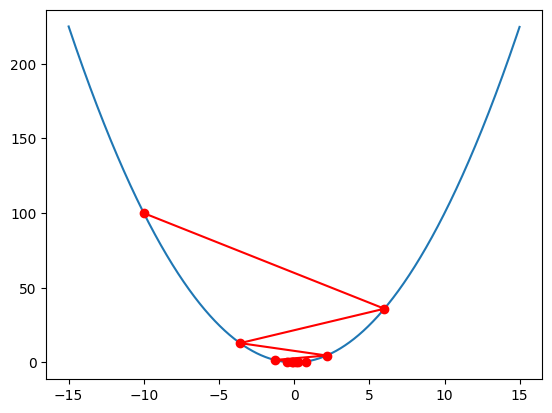

In [180]:
x_values = gradient_descent(0.8, func_grad)
search_path(x_values, func)

## 2D

In [181]:

# 2 * x2**2   => for just having a different parameter 
def func(x1, x2):
  return x1**2 + 2 * x2**2

def func_grad(x1, x2):
  return (2*x1, 4*x2)

In [182]:
class Optimizers:
  def __init__(self, lr_schedule):
    self.lr_schedule = lr_schedule
  
  def lr(self, rate, t):
    if self.lr_schedule == "constant":
      return self.constant_lr(rate)

  
  def constant_lr(self, rate):
    return rate
  


  def gradient_descent(self, x1, x2, t1, t2, func_grad, rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0
  



  def stochastic_gradient_descent(self, x1, x2, t1, t2, func_grad,rate, t):
    gr_x1, gr_x2 = func_grad(x1, x2)
    gr_x1 += np.random.normal(0, 1)
    gr_x2 += np.random.normal(0, 1)
    return x1 - self.lr(rate, t)*gr_x1, x2 - self.lr(rate, t)*gr_x2, 0, 0
  


  def gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad,rate, t):
   # first `x` gradient will be calculated => then update `v`  by the gradient of `x` => then new x is = `x`+ `v`
    alpha = 0.9
    gr_x1, gr_x2 = func_grad(x1, x2)
    v1 = alpha*v1 - self.lr(rate, t)*gr_x1
    v2 = alpha*v2 - self.lr(rate, t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2
 



  def nesterov_gradient_descent_with_momentum(self, x1, x2, v1, v2, func_grad,rate, t):
   # first add `alpha * v` to `x` => then update `v` by the gradient of `x` => then new x is = `x`+ `v`
    alpha = 0.9
    x1 += alpha*v1 
    x2 += alpha*v2 
    gr_x1, gr_x2 = func_grad(x1, x2)

    v1 =alpha*v1 - self.lr(rate, t)*gr_x1
    v2 =alpha*v2 - self.lr(rate, t)*gr_x2
    return x1 + v1, x2 + v2, v1, v2
  




In [183]:
def search(optimizer, func_grad, rate, iteration=20):
  x1, x2, t1, t2 = -5, -4, 0, 0
  x_iterations = [(x1, x2)]
  for i in range(iteration):
    x1, x2, t1, t2 = optimizer(x1, x2, t1, t2, func_grad, rate, i+1)
    x_iterations.append((x1, x2))
  print("epoch {}, x1:{}, x2:{}".format(i+1, x1, x2))
  return x_iterations

In [184]:
def search_path(func, x_iterations):

  # print(*x_iterations)
  # print("_"*50)
  # print(*zip(*x_iterations))
  # print("_"*50)

  plt.plot(*zip(*x_iterations), "-o", color="r")
  x1, x2 = np.meshgrid(np.arange(-5.5, 5.5, 0.1), np.arange(-5.5, 5.5, 0.1))
  plt.contourf(x1, x2, func(x1, x2))
  plt.xlabel("x1")
  plt.ylabel("x2")

epoch 20, x1:-0.057646075230342354, x2:-0.0001462463376025189


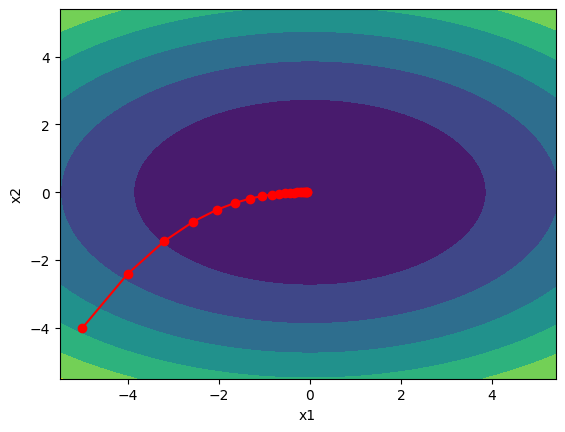

In [185]:
opt = Optimizers("constant")
# search finding optimums => returns x_iterations array 
# search_path plots the X's 
search_path(func, search(opt.gradient_descent, func_grad, 0.1))

In [186]:
print(*search(opt.gradient_descent, func_grad, 0.1))

epoch 20, x1:-0.057646075230342354, x2:-0.0001462463376025189
(-5, -4) (-4.0, -2.4) (-3.2, -1.44) (-2.56, -0.864) (-2.048, -0.5184) (-1.6384, -0.31104) (-1.31072, -0.18662399999999998) (-1.0485760000000002, -0.11197439999999999) (-0.8388608000000002, -0.06718463999999999) (-0.6710886400000001, -0.04031078399999999) (-0.5368709120000001, -0.024186470399999993) (-0.4294967296000001, -0.014511882239999996) (-0.3435973836800001, -0.008707129343999996) (-0.27487790694400005, -0.005224277606399997) (-0.21990232555520003, -0.0031345665638399982) (-0.17592186044416003, -0.001880739938303999) (-0.140737488355328, -0.0011284439629823994) (-0.11258999068426241, -0.0006770663777894395) (-0.09007199254740993, -0.0004062398266736637) (-0.07205759403792794, -0.0002437438960041982) (-0.057646075230342354, -0.0001462463376025189)


epoch 20, x1:-0.20471319763244752, x2:0.16657547618566484


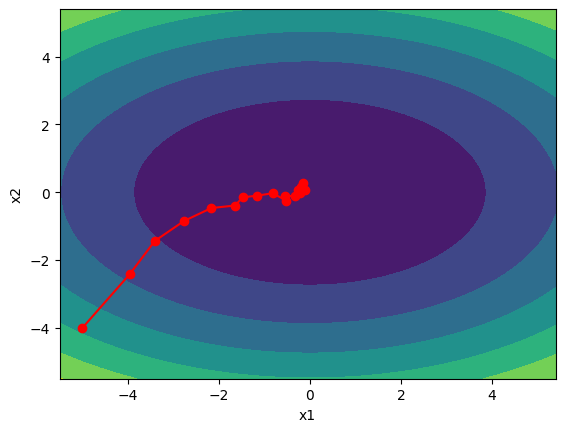

In [187]:
opt = Optimizers("constant")

search_path(func, search(opt.stochastic_gradient_descent, func_grad,0.1))

## Momentum

epoch 20, x1:1.353356690803952, x2:1.1023413364488264


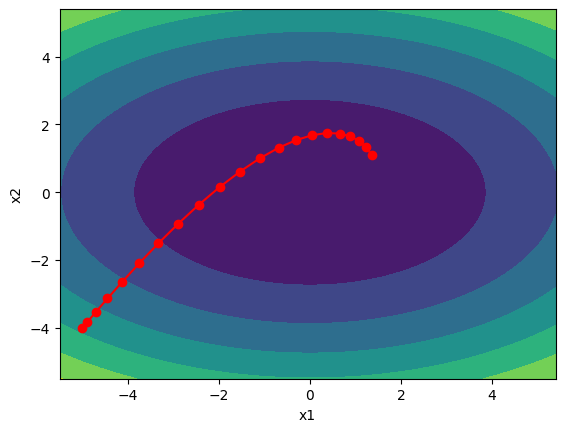

In [188]:
opt = Optimizers("constant")

search_path(func, search(opt.gradient_descent_with_momentum, func_grad,0.01))

## nesterov_gradient_descent_with_momentum

epoch 20, x1:1.6148263020774718, x2:-0.8980800336432664


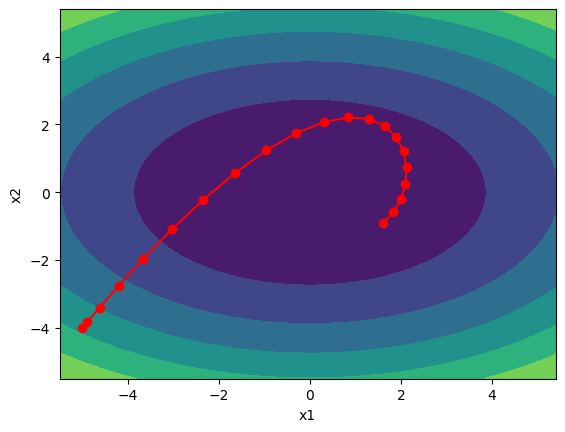

In [189]:
opt = Optimizers("constant")

search_path(func, search(opt.nesterov_gradient_descent_with_momentum, func_grad,0.01))